# Restaurant food cost

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_excel("C:\\Users\HP\Downloads\Restaurant_food_cost\Participants_Data_Final\Data_Train.xlsx")
df_test=pd.read_excel("C:\\Users\HP\Downloads\Restaurant_food_cost\Participants_Data_Final\Data_Test.xlsx")

In [3]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
df_train.shape

(12690, 9)

In [6]:
df_test.shape

(4231, 8)

In [7]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [8]:
df_test.columns


Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [10]:
#joining the two together . The train and testing dataset
df_train['source']='train'
df_test['source']='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [11]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train
...,...,...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,test
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,test
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,test
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,test


In [12]:
df.shape

(16921, 10)

In [13]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
source            object
dtype: object

In [18]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
source              0
dtype: int64

In [19]:
df.isnull().all()

TITLE            False
RESTAURANT_ID    False
CUISINES         False
TIME             False
CITY             False
LOCALITY         False
RATING           False
VOTES            False
COST             False
source           False
dtype: bool

In [20]:
df.describe()

,RESTAURANT_ID,COST
count,16921.000000,12690.000000
mean,7767.211631,655.252246
std,4493.287626,627.003540
min,0.000000,20.000000
25%,3873.000000,300.000000
50%,7751.000000,500.000000
75%,11672.000000,800.000000
max,15573.000000,14000.000000


In [21]:
df.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_24876/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RESTAURANT_ID    0.006775
COST             3.978801
dtype: float64

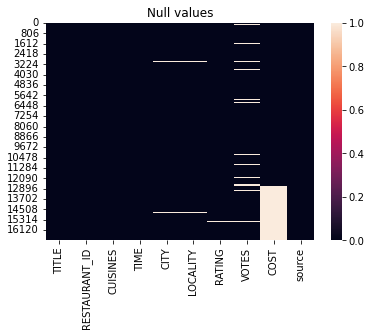

In [23]:
#a heatmap for null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [24]:
df.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


In [29]:
#tranforming the dataset into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TITLE']=le.fit_transform(df['TITLE'])
df['CUISINES']=le.fit_transform(df['CUISINES'])
df['TIME']=le.fit_transform(df['TIME'])
df['CITY']=le.fit_transform(df['CITY'])
df['LOCALITY']=le.fit_transform(df['LOCALITY'])
df['RATING']=le.fit_transform(df['RATING'])
df['VOTES']=le.fit_transform(df['VOTES'])
df['COST']=le.fit_transform(df['COST'])
df['source']=le.fit_transform(df['source'])

In [30]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,34,9438,3294,898,400,328,17,1470,36,1
1,36,13198,364,2301,75,1214,23,1105,43,1
2,34,10915,3729,806,75,1272,19,822,28,1
3,104,6346,5156,340,277,161,22,908,28,1
4,55,15387,2218,750,277,709,19,535,14,1
...,...,...,...,...,...,...,...,...,...,...
16916,34,9057,4259,290,316,1184,20,1060,86,0
16917,95,1247,785,750,42,461,24,1436,86,0
16918,104,8617,2089,2896,128,1370,18,1526,86,0
16919,104,6485,4580,605,216,642,0,2075,86,0


In [31]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
source           0
dtype: int64

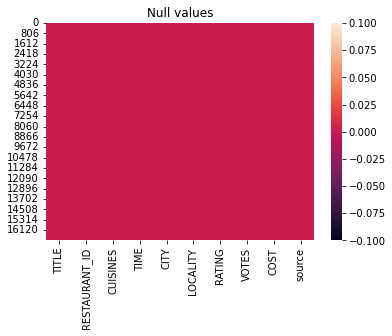

In [32]:
#a heatmap for null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [33]:
df.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,65.004137,7767.211631,2801.322380,1446.928491,178.225519,761.324272,18.767508,1203.335737,38.703623,0.749956
std,35.875571,4493.287626,1504.771403,925.974559,109.450411,464.276256,6.213153,613.729840,29.292102,0.433051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3873.000000,1478.000000,681.000000,75.000000,389.000000,16.000000,715.000000,17.000000,0.000000
50%,64.000000,7751.000000,3054.000000,1372.000000,160.000000,674.000000,19.000000,1279.000000,24.000000,1.000000
75%,104.000000,11672.000000,4008.000000,2265.000000,277.000000,1174.000000,22.000000,1714.000000,86.000000,1.000000
max,122.000000,15573.000000,5182.000000,3294.000000,450.000000,1636.000000,32.000000,2075.000000,86.000000,1.000000


In [34]:
df.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
TITLE,1.000000,-0.000310,0.248437,0.053529,-0.000667,0.040561,-0.042583,0.026647,-0.110230,0.003449
RESTAURANT_ID,-0.000310,1.000000,0.055246,0.007905,0.004820,-0.002275,0.034925,0.002062,0.016992,-0.003113
CUISINES,0.248437,0.055246,1.000000,0.106064,0.018615,0.016770,-0.040945,0.000800,-0.008686,-0.001165
TIME,0.053529,0.007905,0.106064,1.000000,0.002046,-0.008567,-0.033858,0.031825,-0.001993,-0.002521
CITY,-0.000667,0.004820,0.018615,0.002046,1.000000,0.068271,0.034190,0.036887,0.016744,-0.003274
LOCALITY,0.040561,-0.002275,0.016770,-0.008567,0.068271,1.000000,-0.013624,0.011183,-0.009335,0.003988
RATING,-0.042583,0.034925,-0.040945,-0.033858,0.034190,-0.013624,1.000000,-0.024153,0.074397,0.008442
VOTES,0.026647,0.002062,0.000800,0.031825,0.036887,0.011183,-0.024153,1.000000,-0.015018,-0.008177
COST,-0.110230,0.016992,-0.008686,-0.001993,0.016744,-0.009335,0.074397,-0.015018,1.000000,-0.932354
source,0.003449,-0.003113,-0.001165,-0.002521,-0.003274,0.003988,0.008442,-0.008177,-0.932354,1.000000


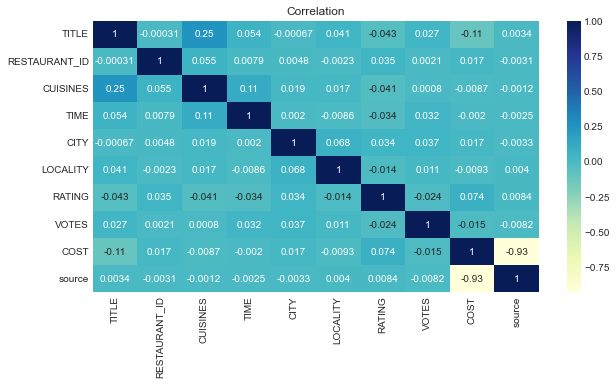

In [35]:
#a correlation heatmap
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.title("Correlation")
plt.show()

In [36]:
df.skew()

TITLE           -0.061023
RESTAURANT_ID    0.006775
CUISINES        -0.229200
TIME             0.302563
CITY             0.292052
LOCALITY         0.353372
RATING          -0.809737
VOTES           -0.270851
COST             0.808310
source          -1.154530
dtype: float64

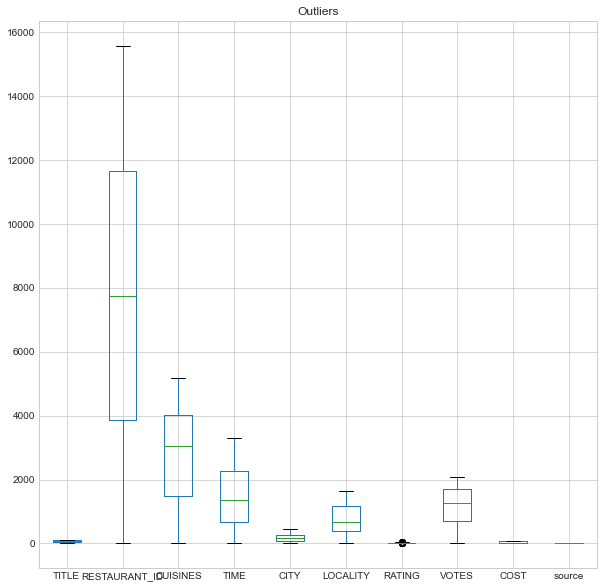

In [49]:
#checking for outliers 
import warnings
warnings.filterwarnings('ignore')

df.iloc[:,0:30].boxplot(figsize=[10,20])
plt.subplots_adjust(bottom=0.5)
plt.title("Outliers")
plt.show()

In [50]:
df.drop(['source'],axis=1,inplace=True)

In [51]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34,9438,3294,898,400,328,17,1470,36
1,36,13198,364,2301,75,1214,23,1105,43
2,34,10915,3729,806,75,1272,19,822,28
3,104,6346,5156,340,277,161,22,908,28
4,55,15387,2218,750,277,709,19,535,14
...,...,...,...,...,...,...,...,...,...
16916,34,9057,4259,290,316,1184,20,1060,86
16917,95,1247,785,750,42,461,24,1436,86
16918,104,8617,2089,2896,128,1370,18,1526,86
16919,104,6485,4580,605,216,642,0,2075,86


array([[<AxesSubplot:title={'center':'TITLE'}>,
        <AxesSubplot:title={'center':'RESTAURANT_ID'}>,
        <AxesSubplot:title={'center':'CUISINES'}>],
       [<AxesSubplot:title={'center':'TIME'}>,
        <AxesSubplot:title={'center':'CITY'}>,
        <AxesSubplot:title={'center':'LOCALITY'}>],
       [<AxesSubplot:title={'center':'RATING'}>,
        <AxesSubplot:title={'center':'VOTES'}>,
        <AxesSubplot:title={'center':'COST'}>]], dtype=object)

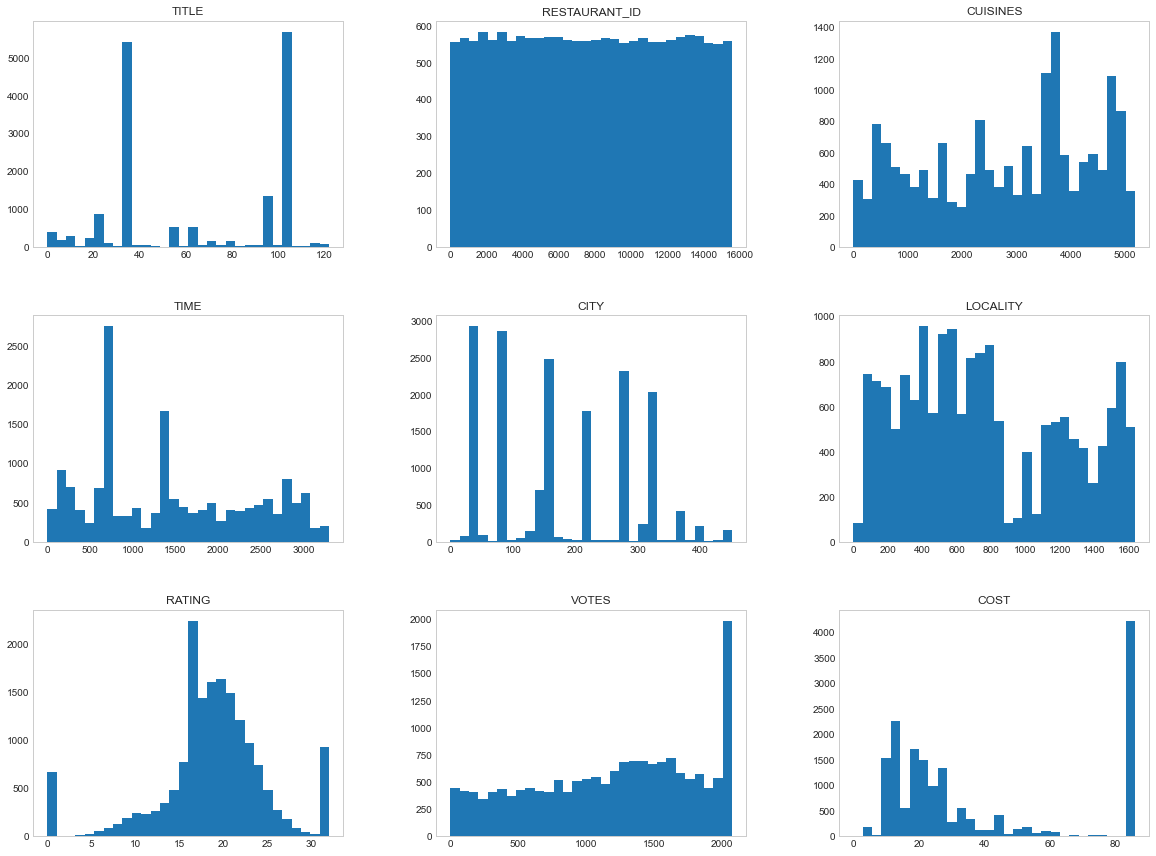

In [52]:
df.hist(grid=False,figsize=(20,15),bins=30)

<AxesSubplot:ylabel='Count'>

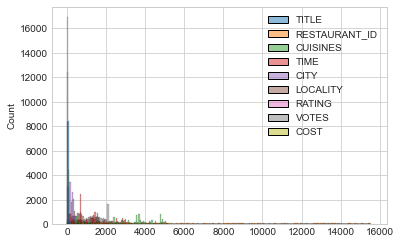

In [56]:
sns.histplot(data=df)

In [57]:
#dividing the dataset into target and label
x=df.drop('COST',axis=1)
y=df['COST']

In [58]:
#training the data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 

In [59]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is = {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is = {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is = 0.01846334738321387
At random state 0,the testing accuracy is = 0.015092986634372973


At random state 1,the training accuracy is = 0.018988539627904144
At random state 1,the testing accuracy is = 0.013126874572281011


At random state 2,the training accuracy is = 0.01860135035410837
At random state 2,the testing accuracy is = 0.014082045613054373


At random state 3,the training accuracy is = 0.019644671670000058
At random state 3,the testing accuracy is = 0.010758268804458737


At random state 4,the training accuracy is = 0.020176365021490783
At random state 4,the testing accuracy is = 0.008553364571205813


At random state 5,the training accuracy is = 0.017356271898537168
At random state 5,the testing accuracy is = 0.020069277107946815


At random state 6,the training accuracy is = 0.017662646495606893
At random state 6,the testing accuracy is = 0.01864934415418873


At random state 7,the training accuracy is = 0.01777369518801608
At rand

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=11)

In [66]:
pred_test=lr.predict(x_test)

In [67]:
pred_train=lr.predict(x_train)

In [68]:
print(r2_score(y_test,pred_test)*100)

2.184750181585382


In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [70]:
pred_test=lr.predict(x_test)
pred_test

array([45.25268547, 39.70257205, 36.88503557, ..., 40.53461133,
       36.11320724, 46.23599658])

In [71]:
pred_train=lr.predict(x_train)
pred_train

array([34.01558257, 41.53911207, 41.46962203, ..., 45.04525567,
       44.09474456, 43.46056185])

In [72]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

2

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([35.38271605, 10.55555556, 53.        , ..., 42.66365132,
       21.14285714, 25.77777778])

In [74]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

40

In [75]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=2,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [76]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

10

In [77]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [78]:
y_pred=model.predict(x_test)
y_pred

array([38.294025, 31.503313, 38.07693 , ..., 41.53757 , 32.716393,
       45.03863 ], dtype=float32)

In [79]:
model.score(x_train,y_train)*100

19.539149674694713

In [80]:
model_accuracy=round(model.score(x_train,y_train)*100)
model_accuracy

20

In [81]:
#Cross validation  for desisiontree
scr=cross_val_score(tree,x,y,cv=5)
scr.mean()
print("Cross validation score of DecisionTreeRegression:",scr.mean())

Cross validation score of DecisionTreeRegression: -2.683543335241024


In [82]:
#Cross validation  for xgboost
scr=cross_val_score(model,x,y,cv=5)
scr.mean()
print("Cross validation score of Xgboost:",scr.mean())

Cross validation score of Xgboost: -1.2285728686038146


In [83]:
#saving the model
import pickle 
filename='churn.pkl'
pickle.dump(tree,open(filename,'wb'))

In [84]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)*-100
result

26.493857465933313

In [85]:
#creatig a new df
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_train[:]],index=["Predicted","Original"])

In [86]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,13526,13527,13528,13529,13530,13531,13532,13533,13534,13535
Predicted,35.382716,10.555556,53.000000,30.747153,61.333333,14.428571,30.747153,86.000000,14.000000,36.931034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,34.015583,41.539112,41.469622,41.747676,42.753678,42.832874,42.198379,36.121137,44.057409,30.778747,...,37.393003,37.057513,43.592754,40.704922,33.801505,38.94593,34.743395,45.045256,44.094745,43.460562
